In [1]:
import os

%matplotlib inline

from pylab import *
import matplotlib.pyplot as plt


Initialisation
==============

* importing pyAgrum
* importing pyAgrum.lib tools
* loading a BN

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

## Create a first BN : bn

In [3]:
bn=gum.loadBN(os.path.join("res","asia.bif"))
# randomly re-generate parameters for every Conditional Probability Table
bn.generateCPTs() 
bn

(gum::BayesNet<double>@0x5586913decd0) BN{nodes: 8, arcs: 8, domainSize: 256, parameters: 36, compression ratio: 85% }

## Create a second BN : bn2

In [4]:
bn2=gum.loadBN(os.path.join("res","asia.bif"))
bn2.generateCPTs()
bn2

(gum::BayesNet<double>@0x5586913eba00) BN{nodes: 8, arcs: 8, domainSize: 256, parameters: 36, compression ratio: 85% }

## bn vs bn2 : different parameters

In [5]:
gnb.sideBySide(bn.cpt(3),bn2.cpt(3),
              captions=["a CPT in bn","same CPT in bn2"])

## Exact and (Gibbs) approximated KL-divergence 

In order to compute KL-divergence, we just need to be sure that the 2 distributions are defined on the same domain (same variables, etc.)

<h3>Exact KL</h3>


In [6]:
g1=gum.BruteForceKL(bn,bn2)
print(g1.compute())

{'klPQ': 2.4916397339991074, 'errorPQ': 0, 'klQP': 3.576074543797689, 'errorQP': 0, 'hellinger': 0.8952599369031542, 'bhattacharya': 0.5120683578267192, 'jensen-shannon': 0.4903383493160822}


If the models are not on the same domain :

In [7]:
bn_different_domain=gum.loadBN(os.path.join("res","alarm.dsl"))

# g=gum.BruteForceKL(bn,bn_different_domain) # a KL-divergence between asia and alarm ... :(
#
# would cause
#---------------------------------------------------------------------------
#OperationNotAllowed                       Traceback (most recent call last)
#
#OperationNotAllowed: this operation is not allowed : KL : the 2 BNs are not compatible (not the same vars : visit_to_Asia?)

<h3>Gibbs-approximated KL</h3>

In [8]:
g=gum.GibbsKL(bn,bn2)
g.setVerbosity(True)
g.setMaxTime(120)
g.setBurnIn(5000)
g.setEpsilon(1e-7)
g.setPeriodSize(500)

In [9]:
print(g.compute())
print("Computed in {0} s".format(g.currentTime()))

{'klPQ': 2.4923341239452173, 'errorPQ': 0, 'klQP': 2.6164192467036207, 'errorQP': 0, 'hellinger': 0.8345026487872016, 'bhattacharya': 0.531956567730852, 'jensen-shannon': 0.43175493676291116}
Computed in 0.635881295 s


--
stopped with epsilon=1e-07
--
Temps de calcul : 0.635881295
Nombre d'itérations : 73000


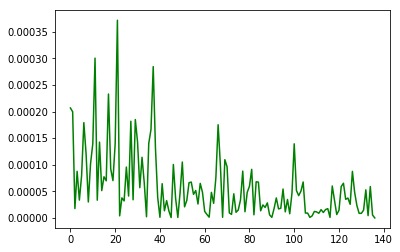

In [10]:
print("--")

print(g.messageApproximationScheme())
print("--")

print("Temps de calcul : {0}".format(g.currentTime()))
print("Nombre d'itérations : {0}".format(g.nbrIterations()))

p=plot(g.history(), 'g')

### Animation of Gibbs KL

Since it may be difficult to know what happens during approximation algorithm, pyAgrum allows to follow the iteration using animated matplotlib figure

In [11]:
g=gum.GibbsKL(bn,bn2)
g.setMaxTime(60)
g.setBurnIn(500)
g.setEpsilon(1e-7)
g.setPeriodSize(5000)

{'klPQ': 2.4971612336287285,
 'errorPQ': 0,
 'klQP': 3.4618518062246277,
 'errorQP': 0,
 'hellinger': 0.892081653029816,
 'bhattacharya': 0.5101504500684725,
 'jensen-shannon': 0.48863016488426175}

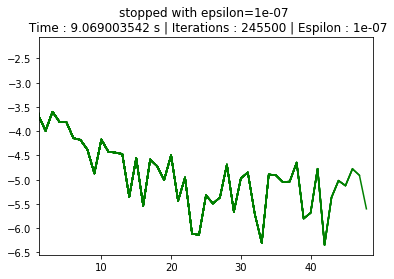

In [12]:
gnb.animApproximationScheme(g) # logarithmique scale for Y
g.compute()